# Sheet
Vergelijk de verschillen in de NBS per issue en per waarde van p

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
%matplotlib inline

In [95]:
conn = sqlite3.connect('C:\\Users\\jelme\\PycharmProjects\\decide-exchange-model\\data\\output\\decide-data_1.db')
data_set_id = 1

In [96]:
df = pd.read_sql("""
SELECT
  a.p as p,
  a.issue as issue,
  a.iteration as iteration,
  a.repetion as repetion,
  a.numerator / a.denominator AS nbs
FROM (SELECT
        sum(ai.position * ai.power * ai.salience) AS numerator,
        sum(ai.salience * ai.power)               AS denominator,
        r.pointer                                 AS repetion,
        i2.pointer                                AS iteration,
        m.p,
  i.name as issue
      FROM actorissue ai
        LEFT JOIN issue i ON ai.issue_id = i.id
        LEFT JOIN actor a ON ai.actor_id = a.id
        LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
        LEFT JOIN repetition r ON i2.repetition_id = r.id
        LEFT JOIN modelrun m ON r.model_run_id = m.id        
      WHERE  ai.type = 'before' AND m.id IN (%s)
     GROUP BY m.id,r.id, i2.id, i.id) a
""" % ','.join(['13', '14']), 
                 conn, 
                 # params=((13, 14), ),
                 index_col='p',                  
                 columns=['nbs']
                )

def avg_std(series):
    avg = np.average(series)
    std = np.var(series, ddof=1)
    
    return '{0} ({1})'.format(round(avg, 5), round(std, 5)) 

table_avg = pd.pivot_table(df, index=['issue','p'], columns=['iteration'],values=['nbs'],aggfunc=np.average)
table_var = pd.pivot_table(df, index=['issue','p'], columns=['iteration'],values=['nbs'],aggfunc=np.var)


# Verloop NBS
In onderstaande tabel wordt het gemiddelde verloop van de NBS scores getoond per issue. Tussen haakjes achter de NBS score staat de standaarddeviatie.

Onder de tabel staat het verloop van het gemiddelde afgebeeld in een grafiek per issue

In [97]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

table_avg

nbs                                              \
iteration                0          1          2          3          4   
issue       p                                                            
Commitments 0.0  51.949891  46.903922  40.014723  35.957876  31.093661   
            0.8  51.949891  46.903922  40.014723  35.998601  31.169453   
Control     0.0  57.621448  61.277734  64.601846  68.377021  69.537549   
            0.8  57.621448  61.278994  64.602530  68.462475  69.548125   
DevlopC2020 0.0  58.144654  60.170779  61.897256  63.594463  66.366451   
            0.8  58.144654  59.334944  60.935066  62.981908  66.235325   
Domestred   0.0  30.707395  32.362114  33.403237  34.731543  35.348225   
            0.8  30.707395  34.108808  35.830509  37.224530  34.686722   
Extra       0.0  64.620690  73.409655  79.837446  84.017912  86.012261   
            0.8  64.620690  73.409655  79.837446  84.019262  86.377613   
MRVdecrease 0.0  52.235915  50.569595  47.280761  50.351033  47.498035   
            0.8  52.235915  50.902355  47.590566  50.522347  47.701101   
Newtreaty   0.0  61.576271  61.040023  57.540597  58.292395  55.807797   
            0.8  61.576271  60.840267  57.292655  57.845659  54.378177   

                                                                        
iteration                5          6          7          8          9  
issue       p                                                           
Commitments 0.0  27.661977  25.322563  22.578786  20.304041  19.838221  
            0.8  28.007059  25.883338  24.109032  23.482495  23.133625  
Control     0.0  72.075387  71.850111  72.645977  72.847660  73.847869  
            0.8  71.890353  72.477236  71.922070  72.759578  73.467242  
DevlopC2020 0.0  67.847209  69.672412  71.637316  71.889880  72.005476  
            0.8  68.673716  70.422913  70.963263  72.155949  72.950570  
Domestred   0.0  33.472802  33.005982  33.067912  32.225171  31.574803  
            0.8  33.031229  33.989558  32.454837  32.744845  32.208970  
Extra       0.0  88.427420  90.063250  90.613543  92.359755  93.603150  
            0.8  88.838974  90.424037  91.767241  92.986852  93.691924  
MRVdecrease 0.0  49.272715  46.990001  48.516096  47.993194  47.311256  
            0.8  49.782348  47.365547  49.061291  48.159496  48.401969  
Newtreaty   0.0  56.650153  56.512465  57.720145  57.494058  57.700881  
            0.8  54.893468  54.582080  55.561715  55.627136  55.651666

In [98]:
table_var

nbs                                                        \
iteration          0             1         2         3         4         5   
issue       p                                                                
Commitments 0.0  0.0  0.000000e+00  0.000000  0.000028  0.000054  0.078218   
            0.8  0.0  0.000000e+00  0.000000  0.005506  0.016912  0.073767   
Control     0.0  0.0  0.000000e+00  0.000000  0.000000  0.001215  0.000605   
            0.8  0.0  2.755447e-04  0.000097  0.001461  0.002291  0.089179   
DevlopC2020 0.0  0.0  0.000000e+00  0.000081  0.000930  0.001609  0.214159   
            0.8  0.0  3.281962e-02  0.006432  0.001452  0.004416  0.072160   
Domestred   0.0  0.0  0.000000e+00  0.001305  0.001047  0.003141  0.002760   
            0.8  0.0  5.931735e-02  0.139509  0.078946  0.133825  0.063064   
Extra       0.0  0.0  0.000000e+00  0.000000  0.000006  0.000003  0.032812   
            0.8  0.0  0.000000e+00  0.000000  0.004770  0.004030  0.010694   
MRVdecrease 0.0  0.0  3.340425e-02  0.159544  0.232584  0.000994  0.016336   
            0.8  0.0  3.132709e-03  0.078951  0.013553  0.011005  0.104003   
Newtreaty   0.0  0.0  8.083003e-02  0.455040  0.519557  0.000255  0.003002   
            0.8  0.0  1.154686e-07  0.106053  0.011591  0.011736  0.014849   

                                                         
iteration               6         7         8         9  
issue       p                                            
Commitments 0.0  0.054543  0.038960  0.010215  0.037910  
            0.8  0.059988  0.468240  1.023983  2.806580  
Control     0.0  0.000399  0.000180  0.008653  0.018530  
            0.8  1.017938  0.222013  0.155624  0.058127  
DevlopC2020 0.0  0.088530  0.001449  0.000487  0.004820  
            0.8  0.325595  0.157429  0.238920  0.055161  
Domestred   0.0  0.012727  0.053681  0.075207  0.057910  
            0.8  0.147551  0.193090  0.365098  0.557408  
Extra       0.0  0.000144  0.011683  0.000586  0.004905  
            0.8  0.001566  0.023154  0.010992  0.029638  
MRVdecrease 0.0  0.016243  0.082836  0.060895  0.431277  
            0.8  0.570473  0.011568  1.443060  0.613245  
Newtreaty   0.0  0.025573  0.022046  0.046459  0.001559  
            0.8  0.222345  0.434998  0.146198  1.162251

In [99]:
cursor = conn.execute('SELECT issue.name, issue.id FROM issue WHERE issue.data_set_id = ? ORDER BY issue.name', [data_set_id])
issues = cursor.fetchall()

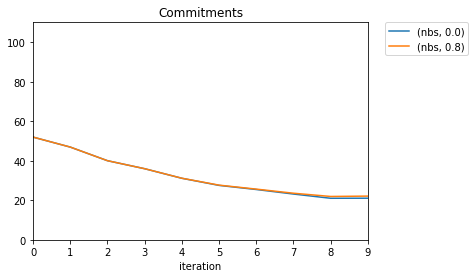

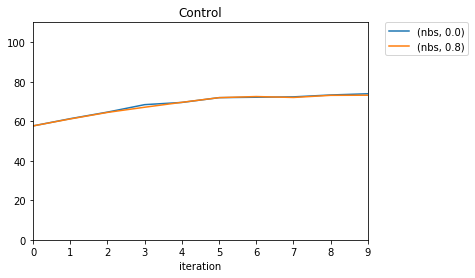

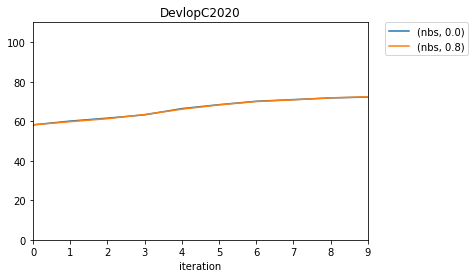

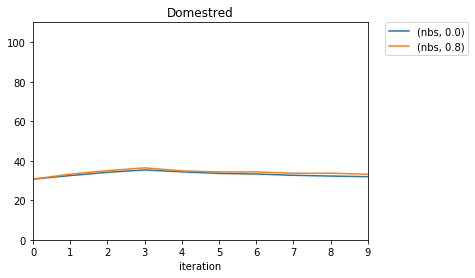

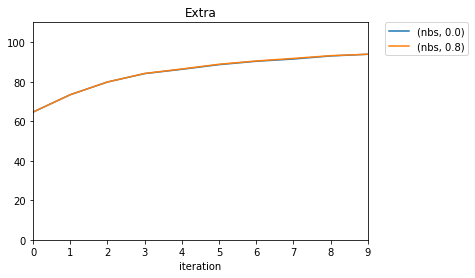

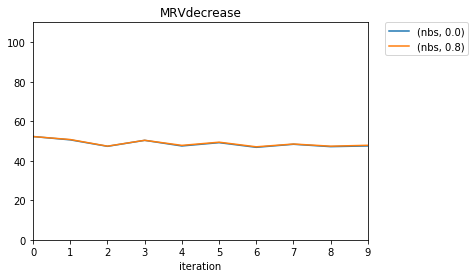

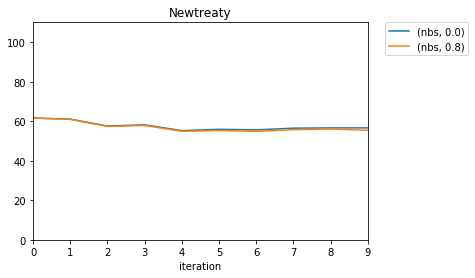

In [100]:
for name, issue_id in issues:
    df = pd.read_sql("""
    SELECT
    a.p as p,
    a.issue as issue,
    a.iteration as iteration,
    a.repetion as repetion,
    a.numerator / a.denominator AS nbs
    FROM (SELECT
    sum(ai.position * ai.power * ai.salience) AS numerator,
    sum(ai.salience * ai.power)
    AS denominator,
    r.pointer
    AS repetion,
    i2.pointer
    AS iteration,
    m.p,
    i.name as issue
    FROM actorissue ai
    LEFT JOIN issue i ON ai.issue_id = i.id
    LEFT JOIN actor a ON ai.actor_id = a.id
    LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
    LEFT JOIN repetition r ON i2.repetition_id = r.id
    LEFT JOIN modelrun m ON r.model_run_id = m.id
    LEFT JOIN dataset d ON a.data_set_id = d.id
    WHERE ai.type = 'before' AND d.id = ? AND i.id = ?
    GROUP BY m.id,r.id, i2.id, i.id) a
    """,
    conn,
    params=(1,issue_id),
    index_col='p',
    columns=['nbs']
    )
    table = pd.pivot_table(df, index=['iteration'], columns=['p'], values=['nbs'])
    plot = table.plot()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(name)
    plt.ylim(0, 110)
    plt.show()